In [1]:
import postprocess
import plot
import QuasinormalMode
import spheroidal

from postprocess import *
from plot import *
from QuasinormalMode import *
from spheroidal import *

2023-04-06 18:57:11.412600: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-04-06 18:57:11.587638: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-04-06 18:57:11.601246: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIB

In [7]:
from importlib import reload

In [3]:
reload(postprocess)
from postprocess import *
reload(plot)
from plot import *
reload(QuasinormalMode) 
from QuasinormalMode import *
reload(spheroidal)
from spheroidal import *

In [4]:
import pandas as pd
from matplotlib import ticker 

In [5]:
settingname = "normal2"
df = pd.read_csv(f"./pickle/data_frame/{settingname}.csv")

In [8]:
df = classify_modes(df)

In [14]:
t_start_0305_22 = df[(df["SXS_num"] == 305) & (df["l"] == 2) & (df["m"] == 2)][['mode_string', 't_flat_start']]

In [15]:
t_start_0305_22.to_numpy()

array([['2.2.1', 9.8],
       ['3.3.0', 33.1],
       ['3.2.0', 20.3],
       ['2.-2.0', 32.2],
       ['constant', 14.5],
       ['2.2.0', 0.0]], dtype=object)

In [10]:
df0305 = df[(df["SXS_num"] == 305) & (df["l"] == 2) & (df["m"] == 2)]

In [13]:
df0305[['mode_string', 'A_med', 'phi_med']]

,mode_string,A_med,phi_med
6211,constant,0.000020,1.986013
6212,3.3.0,0.000470,-10.813416
6213,3.2.0,0.003724,-8.431901
6214,2.2.0,0.967384,-1.474554
6215,2.2.1,4.145752,0.692011
6216,2.-2.0,0.000092,20.069852


In [7]:
ROOT_PATH = globals()['_dh'][0]
PLOT_PATH = os.path.join(ROOT_PATH, f"plots/{settingname}/")
PLOT_PATH_ROOT = os.path.join(ROOT_PATH, f"plots/")

In [8]:
df_screen = screen_mode(df, 4, 4, '2.2.0x2.2.0', '2.-2.0x2.-2.0', A_cut = 0.2)

In [9]:
df_screen

,Unnamed: 0,SXS_num,M_rem,chi_rem,chi_1_z,chi_2_z,q,l,m,retro,...,phi_hi,phi_low,eta,is_quadratic,is_fundamental,is_overtone,is_retrograde,harm_type,natural_l,natural_m
829,0,1432,0.972747,0.791817,0.657564,0.792533,5.839094,4,4,False,...,-4.498103,-4.590630,0.124838,True,False,False,False,basic,4,4
2710,0,1477,0.911258,0.907536,0.799914,0.799914,1.000000,4,4,False,...,-9.605226,-9.834183,0.250000,True,False,False,False,basic,4,4
2837,0,1481,0.914710,0.898601,0.731187,0.793727,0.999974,4,4,False,...,-12.340568,-12.644488,0.250000,True,False,False,False,basic,4,4
3843,0,211,0.951110,0.683516,-0.899686,0.899788,1.000007,4,4,False,...,-7.668768,-8.106241,0.250000,True,False,False,False,basic,4,4
4089,0,225,0.926758,0.857391,0.400011,0.799907,0.999926,4,4,False,...,-10.577367,-11.095250,0.250000,True,False,False,False,basic,4,4
4161,0,229,0.935155,0.817299,0.649960,0.249999,1.000026,4,4,False,...,-6.801991,-7.046262,0.250000,True,False,False,False,basic,4,4
4201,0,231,0.934931,0.816065,0.899793,0.000002,1.000180,4,4,False,...,-6.222177,-6.607930,0.250000,True,False,False,False,basic,4,4


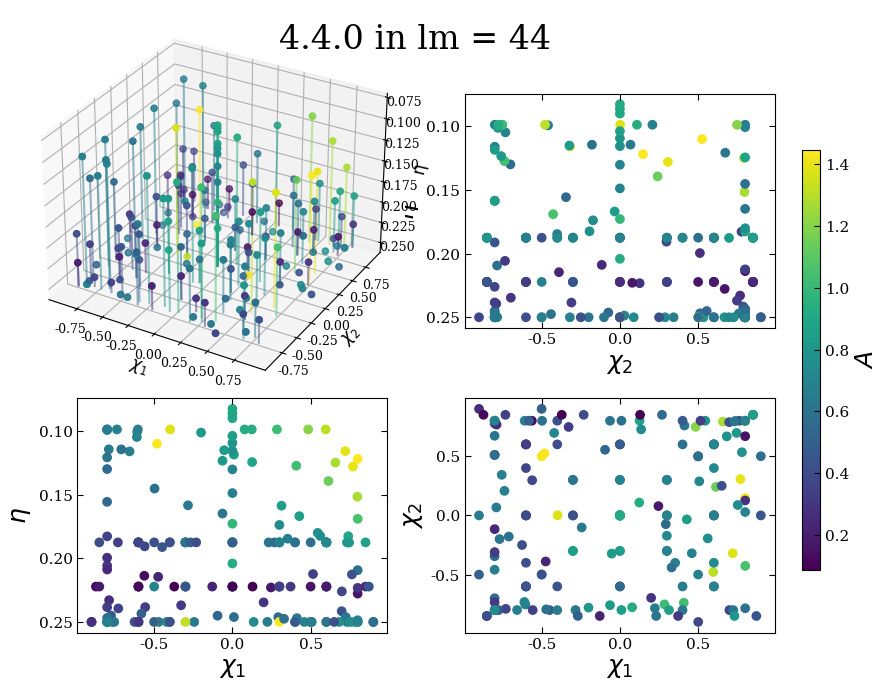

In [10]:
mode_plot_3D_eta(df, 4, 4, "4.4.0", "4.-4.0", adjust_eta = True,
                 adjust_delta = False, plot_log = False, eta_cut = 0.24,
                 adjust_eta_poly="1-3*x")

In [11]:
plot3Dlist = [
    # regular modes
    (2, 2, "2.2.0", False, "1"), (2, 2, "2.2.1", False, "1"), (3, 3, "3.3.0", True, "1"), (3, 3, "3.3.1", True, "1"),
    (3, 2, "3.2.0", False, "1-3*x"), (2, 1, "2.1.0", True, "1"), (4, 4, "4.4.0", False, "1-3*x"), (5, 5, "5.5.0", True, "1-2*x"),
    (2, 0, "2.0.0", False, "1"), (6, 6, "6.6.0", False, "1 - 5*x + 5*x**2"),
    # mixing modes
    (2, 2, "3.2.0", False, "1-3*x"), (3, 2, "2.2.0", False, "1"),
    # recoil modes
    (2, 2, "3.3.0", True, "1"), (3, 3, "2.2.0", False, "1"), (2, 1, "2.2.0", False, "1"),
    # retrograde modes
    (2, 2, "2.-2.0", False, "1"), (2, 1, "2.-1.0", False, "1"),
    # quad modes
    (4, 4, "2.2.0x2.2.0", False, "1"), (5, 5, "2.2.0x3.3.0", False, "1"),
    (6, 6, "2.2.0x4.4.0", False, "1"), (6, 6, "3.3.0x3.3.0", False, "1")
    ]

In [12]:
for l, m, pro_string, adjust_delta, adjust_eta_poly in plot3Dlist:
# l, m = 5, 5
# pro_string = "2.2.0x3.3.0"
    retro_string = qnm_string_m_reverse(pro_string)
    mode_plot_3D_eta(df, l, m, pro_string, retro_string, adjust_delta = adjust_delta, plot_log = False, eta_cut = 0.24,
                 adjust_eta_poly=adjust_eta_poly)
    plt.savefig(PLOT_PATH + f"3Dplots/{settingname}_{l}{m}_{pro_string}.pdf", bbox_inches = "tight")
    plt.savefig(PLOT_PATH + f"3Dplots/{settingname}_{l}{m}_{pro_string}.png", dpi = 150, bbox_inches = "tight",
                facecolor='white', transparent=False)
    plt.clf()

/home/mcheung1/Ringdown/jaxqualin/Jaxqualin/plot.py:519: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(2,2, figsize = (9, 7))


<Figure size 900x700 with 0 Axes>

<Figure size 900x700 with 0 Axes>

<Figure size 900x700 with 0 Axes>

<Figure size 900x700 with 0 Axes>

<Figure size 900x700 with 0 Axes>

<Figure size 900x700 with 0 Axes>

<Figure size 900x700 with 0 Axes>

<Figure size 900x700 with 0 Axes>

<Figure size 900x700 with 0 Axes>

<Figure size 900x700 with 0 Axes>

<Figure size 900x700 with 0 Axes>

<Figure size 900x700 with 0 Axes>

<Figure size 900x700 with 0 Axes>

<Figure size 900x700 with 0 Axes>

<Figure size 900x700 with 0 Axes>

<Figure size 900x700 with 0 Axes>

<Figure size 900x700 with 0 Axes>

<Figure size 900x700 with 0 Axes>

<Figure size 900x700 with 0 Axes>

<Figure size 900x700 with 0 Axes>

<Figure size 900x700 with 0 Axes>

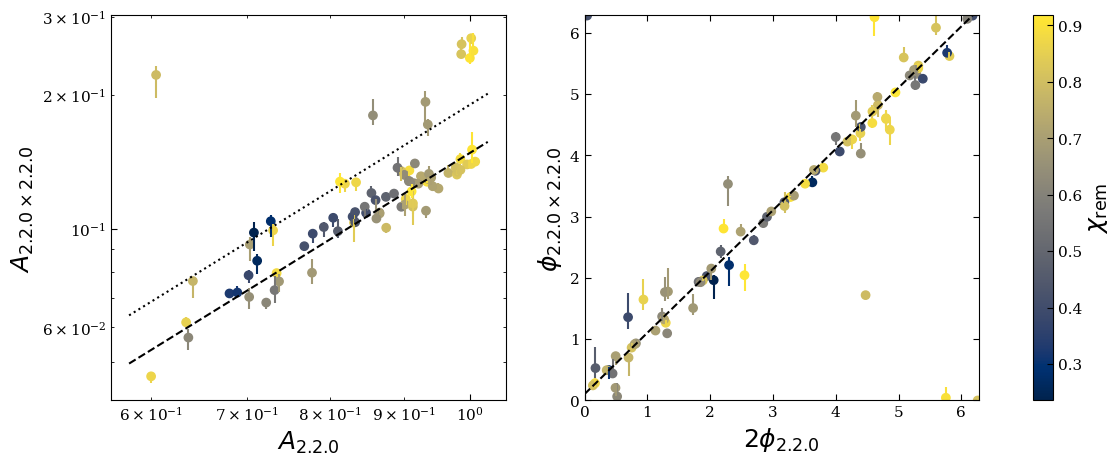

In [14]:
quad_l, quad_m = 4, 4
lin_l, lin_m = 2, 2
pro_quad_mode = "2.2.0x2.2.0"
pro_lin_mode = "2.2.0"
retro_quad_mode = qnm_string_m_reverse(pro_quad_mode)
retro_lin_mode = qnm_string_m_reverse(pro_lin_mode)

fig, axs = plt.subplots(1, 2, figsize = (14, 5))

plot_mode_vs_mode_amplitude(df, quad_l, quad_m, pro_quad_mode, retro_quad_mode,
                            lin_l, lin_m, pro_lin_mode, retro_lin_mode,
                            fit_type = "quadratic",
                            fig = fig, ax = axs[0], colorbar = False)
xsfit = np.linspace(*axs[0].get_xlim(), num = 100)
ysfit = linfunc2([-0.829738], np.log10(xsfit))
axs[0].loglog(xsfit, 10**ysfit, c = "k", ls = "--")
ysfit2 = linfunc2([np.log10(0.19)], np.log10(xsfit))
axs[0].loglog(xsfit, 10**ysfit2, c = "k", ls = ":")
# ysfit3 = linfunc2([np.log10(0.17)], np.log10(xsfit))
# axs[0].loglog(xsfit, 10**ysfit3, c = "k", ls = "-.")
# ysfit4 = linfunc2([np.log10(0.1637)], np.log10(xsfit))
# axs[0].loglog(xsfit, 10**ysfit4, c = "k", ls = "-")
axs[0].plot()

sc = plot_mode_vs_mode_phase(df, quad_l, quad_m, pro_quad_mode, retro_quad_mode,
                             lin_l, lin_m, pro_lin_mode, retro_lin_mode,
                             fit_type = "quadratic",
                             fig = fig, ax = axs[1], colorbar = False, return_sc = True)
xsfit = np.linspace(0, 2*np.pi, num = 100)
ysfit = xsfit + 0.105
axs[1].plot(xsfit, ysfit, ls = "--", c = 'k')

cb = fig.colorbar(sc, ax = axs)
cb.ax.set_ylabel(r"$\chi_{\rm rem}$")

plt.savefig(PLOT_PATH + f"dependence/{settingname}_{pro_lin_mode}_{pro_quad_mode}.pdf", bbox_inches = "tight")
plt.savefig(PLOT_PATH + f"dependence/{settingname}_{pro_lin_mode}_{pro_quad_mode}.png", dpi = 150, bbox_inches = "tight",
            facecolor='white', transparent=False)

In [14]:
spheroidal_check_list = [(2, 2, 3, 0), (3, 2, 2, 0)]

In [22]:
from matplotlib.cm import get_cmap

1446 0.1797445262140178
1449 0.0104997153282985
1461 0.3247435333170594
1462 0.2619787032171229
1484 0.3129016027050195
1494 0.4156907034660702
233 0.389877236144012
236 0.4268508766060001
237 0.4645534520110005
241 0.526308386718
260 0.1244714960710012
261 0.2397770557600026
262 0.270613474329
264 0.2495322685770005
265 0.2566123051830005
266 0.2843549342800001
267 0.299237657077
1448 0.0125152107495962
1449 0.0104997153282985
1455 0.0212991195598697


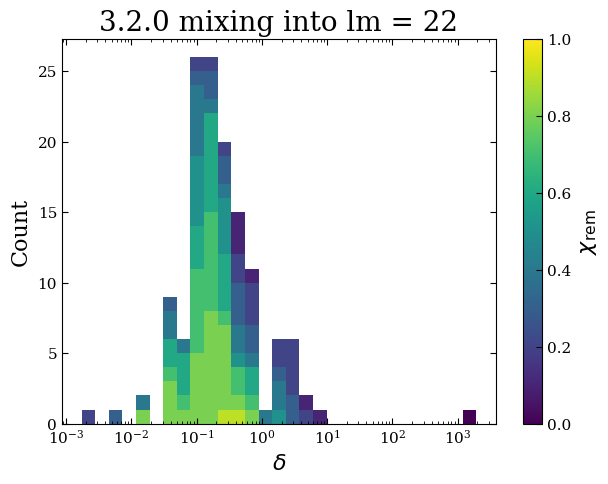

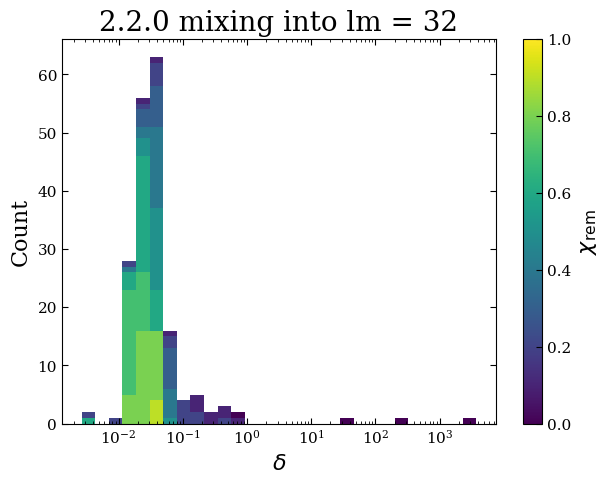

In [24]:
for l, m, l_p, n_p in spheroidal_check_list:
    mix_check_num = mixing_check_SXS_nums(df, l, m, l_p, n_p)

    ratio_err_list = []
    chi_list = []

    for SXS_num in mix_check_num:
        df_num = df[df['SXS_num'] == SXS_num]
        chi_rem = df_num['chi_rem'].values[0]
        chi_list.append(chi_rem)
        A_ratio, phi_diff = give_mixing_ratio(df_num, l, m, l_p, n_p)
        mu = ssmc_ratio(l, m, l_p, n_p, chi_rem)
        muabs = np.abs(mu)
        ratio_err = np.abs((A_ratio - muabs)/muabs)
        if ratio_err > 1:
            print(SXS_num, chi_rem)
        ratio_err_list.append(ratio_err)

    ratio_err_list = np.array(ratio_err_list)
    chi_list = np.array(chi_list)

    fig, ax = plt.subplots(figsize = (7,5))

    chi_rem_color_list = np.linspace(0, 1, num = 11)[:-1]
    cmap = get_cmap('viridis')
    
    logbins = np.logspace(np.log10(min(ratio_err_list)),np.log10(max(ratio_err_list)),30)
    for i, chi in enumerate(chi_rem_color_list):
        ax.hist(ratio_err_list[chi_list > chi], bins = logbins, color = cmap(chi))
    # add colorbar to the plot corresponding to chi_rem
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
    sm._A = []
    cbar = fig.colorbar(sm, ax = ax)
    cbar.ax.set_ylabel(r"$\chi_{\rm rem}$", fontsize = 16)
    ax.set_xscale('log')
    ax.set_xlabel("$\delta$", fontsize = 16)
    ax.set_ylabel("Count", fontsize = 16)
    ax.set_title(f"{l_p}.{m}.{n_p} mixing into lm = {l}{m}", fontsize = 20)
    plt.savefig(PLOT_PATH + f"spheroidal/{settingname}_{l}{m}_{l_p}.{m}.{n_p}.pdf", bbox_inches = "tight")
    plt.savefig(PLOT_PATH + f"spheroidal/{settingname}_{l}{m}_{l_p}.{m}.{n_p}.png", dpi = 150, bbox_inches = "tight",
            facecolor='white', transparent=False)

In [94]:
df_weak = pd.read_csv(f"./pickle/data_frame/weak.csv")
df_normal = pd.read_csv(f"./pickle/data_frame/normal.csv")
df_strong = pd.read_csv(f"./pickle/data_frame/strong.csv")

In [95]:
df_normal.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'SXS_num', 'M_rem', 'chi_rem', 'chi_1_z',
       'chi_2_z', 'q', 'l', 'm', 'retro', 'mode_string', 'A_med', 'A_hi',
       'A_low', 'phi_med', 'phi_hi', 'phi_low'],
      dtype='object')

In [171]:
df_weak_normal = df_weak.merge(df_normal, how = "inner",
                                on = ['SXS_num', 'M_rem',
                                      'chi_rem', 'chi_1_z',
                                      'chi_2_z', 'q', 'l', 'm', 
                                      'retro', 'mode_string'],
                              suffixes=('_1', '_2'))
df_normal_strong = df_normal.merge(df_strong, how = "inner",
                                on = ['SXS_num', 'M_rem',
                                      'chi_rem', 'chi_1_z',
                                      'chi_2_z', 'q', 'l', 'm', 
                                      'retro', 'mode_string'],
                              suffixes=('_1', '_2'))
df_weak_strong = df_weak.merge(df_strong, how = "inner",
                                on = ['SXS_num', 'M_rem',
                                      'chi_rem', 'chi_1_z',
                                      'chi_2_z', 'q', 'l', 'm', 
                                      'retro', 'mode_string'],
                              suffixes=('_1', '_2'))
                              

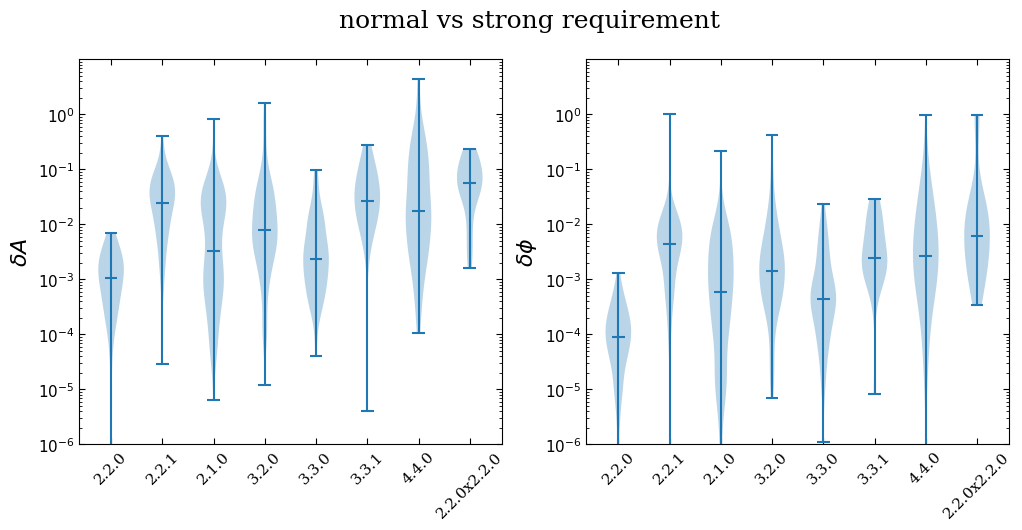

In [207]:
setting_low = "normal"
setting_hi = "strong"

if setting_low == 'weak' and setting_hi == 'strong':
    df_in = df_weak_strong
elif setting_low == 'weak' and setting_hi == 'normal':
    df_in = df_weak_normal
elif setting_low == 'normal' and setting_hi == 'strong':
    df_in = df_normal_strong
else:
    raise ValueError

compare_list = [(2, 2, '2.2.0'), (2, 2, '2.2.1'), 
                (2, 1, '2.1.0'), (3, 2, '3.2.0'),
                (3, 3, "3.3.0"), (3, 3, '3.3.1'),
                (4, 4, "4.4.0"), 
                (4, 4, "2.2.0x2.2.0")]

fig, axs = plt.subplots(1,2, figsize = (12, 5))

ds_A = []
ds_phi = []
mode_strings = []

for l, m, pro_mode_string in compare_list:

    retro_mode_string = qnm_string_m_reverse(pro_mode_string)

    df_compare = df_in[((df_in['l'] == l) & (df_in['m'] == m) & (df_in['mode_string'] == pro_mode_string)
                        & (df_in['retro'] == False)) |
                        ((df_in['l'] == l) & (df_in['m'] == m) & (df_in['mode_string'] == retro_mode_string)
                        & (df_in['retro'] == True))  ]

    A_1 = df_compare['A_med_1'].to_numpy()
    A_2 = df_compare['A_med_2'].to_numpy()
    phi_1 = df_compare['phi_med_1'].to_numpy()    
    phi_2 = df_compare['phi_med_2'].to_numpy()
    
    A_delta = np.abs((A_2 - A_1)/A_1)
    A_delta_nonzero = A_delta[A_delta != 0]
    phi_delta = np.minimum(np.abs((phi_2%(2*np.pi) - phi_1%(2*np.pi))/(2*np.pi)),
                    (2*np.pi - np.abs((phi_2%(2*np.pi) - phi_1%(2*np.pi)))/(2*np.pi)))
    phi_delta_nonzero = phi_delta[phi_delta != 0]

    ds_A.append(np.log10(A_delta_nonzero))
    ds_phi.append(np.log10(phi_delta_nonzero))
    mode_strings.append(pro_mode_string)

    # ax.scatter([pro_mode_string] * len(A_delta_nonzero), A_delta_nonzero, alpha = 0.1)
axs[0].violinplot(ds_A, showextrema=True, showmedians=True, points = 100)
axs[1].violinplot(ds_phi, showextrema=True, showmedians=True, points = 100)

for ax in axs:
    ax.set_ylim(-6, 1)
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
    ymin, ymax = ax.get_ylim()
    tick_range = np.arange(np.floor(ymin), ymax)
    ax.yaxis.set_ticks(tick_range)
    ax.yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

    ax.set_xticks(list(range(1, len(compare_list) + 1)))
    ax.set_xticklabels(mode_strings)
    ax.tick_params('x', rotation = 45)
axs[0].set_ylabel("$\delta A$", fontsize = 16)
axs[1].set_ylabel("$\delta \phi$", fontsize = 16)
fig.suptitle(f"{setting_low} vs {setting_hi} requirement", fontsize = 18)
plt.savefig(PLOT_PATH_ROOT + f"{setting_low}_vs_{setting_hi}.pdf", bbox_inches = "tight")
plt.savefig(PLOT_PATH_ROOT + f"{setting_low}_vs_{setting_hi}.png", dpi = 150, bbox_inches = "tight",
        facecolor='white', transparent=False)